In [1]:
import pandas as pd

In [2]:
gipuzkoa = '../TFM/gipuzkoa2019.csv'

In [59]:
df = pd.read_csv(gipuzkoa, sep=';', encoding='latin-1')
df.head()

,ORDUA-HORA,ZENB-ESCRUT.,ESPARRUARREN KOD.-COD.AMBITO,ESPARRUAREN IZENA-NOMBRE AMBITO,ZENTSUA-CENSO,HAUTETSIAK-ELECTOS,PARTE HARTZE %-% PARTICIPACION,HAUTESLEAK-VOTANTES,BALIOGABEAK-NULOS,BALIOZKOAK-VALIDOS,...,15 HAUTAGAIA-CANDIDATURA 15,BALIOZKO BOTOEKIKO %-% SOBRE VOTOS VALIDOS.14,BOTOAK-VOTOS.14,HAUTETSIAK-ELECTOS.15,ANTEULT.ESCAÑO,ULTIMO ESCAÑO,PARTIDO 1 OPTA ULT.ESCAÑO,VOTOS PARTIDO 1,PARTIDO 2 OPTA ULT.ESCAÑO,VOTOS PARTIDO 2
0,09:57,100.0,999,G I P U Z K O A,558145,986,66.62,371889,3246.0,368643.0,...,BESTEAK-OTROS,2.24,7915,126,,,,0.0,,0.0
1,09:57,100.0,1,ABALTZISKETA,253,7,69.96,177,5.0,172.0,...,,,,,HERRIGINTZA,HERRIGINTZA,,0.0,,0.0
2,09:57,100.0,2,ADUNA,356,7,73.03,260,13.0,247.0,...,,,,,EH BILDU - EUSKAL HERRIA BILDU,EH BILDU - EUSKAL HERRIA BILDU,,0.0,,0.0
3,09:57,100.0,3,AIZARNAZABAL,553,7,75.40,417,7.0,410.0,...,,,,,EH BILDU - EUSKAL HERRIA BILDU,EH BILDU - EUSKAL HERRIA BILDU,EUZKO ALDERDI JELTZALEA - PNV,38.0,P.SOCIALISTA EUSKADI-EE(PSOE),49.0
4,09:57,100.0,4,ALBIZTUR,229,7,65.50,150,1.0,149.0,...,,,,,ALBIZTUR BIZITUZ,ALBIZTUR BIZITUZ,P.SOCIALISTA EUSKADI-EE(PSOE),19.0,,0.0


In [60]:
df_gipu = df[['ESPARRUAREN IZENA-NOMBRE AMBITO', 'ZENTSUA-CENSO', 'PARTE HARTZE %-% PARTICIPACION', 
             'HAUTESLEAK-VOTANTES']]
df_gipu.columns = ['Municipio', 'Censo', 'Participacion', 'Votos']
df_gipu['Municipio'] = df_gipu['Municipio'].str.title()
df_gipu[12:20]

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Municipio,Censo,Participacion,Votos
12,Arama,150,69.33,104
13,Aretxabaleta,5441,70.74,3849
14,Asteasu,1158,61.22,709
15,Ataun,1238,80.69,999
16,Aia,1536,65.88,1012
17,Azkoitia,8507,70.07,5961
18,Azpeitia,11237,70.64,7938
19,Beasain,9955,65.14,6485


In [61]:
df_1 = '../TFM/1_Data/Votos_2019.csv'

In [62]:
df_2019 = pd.read_csv(df_1)
df_gipu_2019 = df_2019[['Municipio', 'part_pred_2019', 'Prediccion','Censo']]

In [63]:
df_merge = pd.merge(df_gipu, df_gipu_2019, on='Municipio', how='left')
df_merge_1 = df_merge[df_merge.Prediccion.isnull()]
df_merge_1

,Municipio,Censo_x,Participacion,Votos,part_pred_2019,Prediccion,Censo_y
0,G I P U Z K O A,558145,66.62,371889,NaN,NaN,NaN
17,Azkoitia,8507,70.07,5961,NaN,NaN,NaN
35,Ezkio-Itsaso,485,57.31,278,NaN,NaN,NaN
55,Arrasate-Mondragon,17381,66.34,11532,NaN,NaN,NaN
64,Pasaia,12467,60.29,7517,NaN,NaN,NaN
65,Soraluze-Placencia,2948,70.62,2082,NaN,NaN,NaN
68,Donostia-San Sebastian,148152,65.16,96537,NaN,NaN,NaN


In [64]:
df_merge.loc[55] = ['Arrasate', 17381, 66.34, 11532, 66, 2, 17446.0]
df_merge.loc[65] = ['Soraluze', 2948, 70.62, 2082, 67, 2, 3007.0]
df_merge.loc[68] = ['Donostia', 148152, 65.16, 96537, 62, 2, 147061.0]

In [66]:
df_merge.loc[55]

Municipio         Arrasate
Censo_x              17381
Participacion        66.34
Votos                11532
part_pred_2019          66
Prediccion               2
Censo_y              17446
Name: 55, dtype: object

In [67]:
df_gipu_2019[df_gipu_2019['Municipio'].str.contains('Donos', case=False)]

,Municipio,part_pred_2019,Prediccion,Censo
75,Donostia / San Sebastián,62,2,147061.0


In [68]:
def participacion(resultado):
    if resultado > 72:
        return 1
    else:
        return 2
    
participacion(69.96)

2

In [69]:
df_merge['participacion'] = df_merge['Participacion'].apply(participacion)

In [81]:
df_final_gip = df_merge.dropna()

In [87]:
df_final_gip.head()

,Municipio,Censo_x,Participacion,Votos,part_pred_2019,Prediccion,Censo_y,participacion,part_pred
1,Abaltzisketa,253,69.96,177,78.0,1.0,252.0,2,1
2,Aduna,356,73.03,260,74.0,1.0,343.0,1,1
3,Aizarnazabal,553,75.40,417,81.0,1.0,542.0,1,1
4,Albiztur,229,65.50,150,71.0,1.0,248.0,2,2
5,Alegia,1270,73.54,934,72.0,2.0,1258.0,1,2


In [85]:
sum(df_final_gip['Prediccion'] == df_final_gip['participacion'])

48

In [86]:
df_final_gip['part_pred'] = df_final_gip['part_pred_2019'].apply(participacion)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
sum(df_final_gip['part_pred'] == df_final_gip['participacion'])

55

In [90]:
def integer(number):
    return int(number)
integer(76.8)

76

In [92]:
sum(df_final_gip['part_pred_2019'] == df_final_gip['Participacion'].apply(integer))

10

In [93]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

In [94]:
df_2019_real = df_final_gip['participacion']
df_2019_pred = df_final_gip['Prediccion']

test accuracy for Linear SVM classifier: 64.0 %


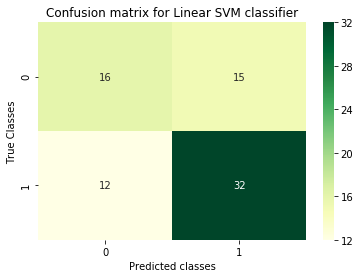

In [95]:
print('test accuracy for Linear SVM classifier:'\
      , round(accuracy_score(df_2019_real, df_2019_pred)*100, 2), '%')
plt.title('Confusion matrix for Linear SVM classifier')
sns.heatmap(confusion_matrix(df_2019_real, df_2019_pred), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [97]:
mean_squared_error(df_final_gip['Participacion'].apply(integer),df_final_gip['part_pred_2019'])

39.586666666666666

In [83]:
df_final_gip['Participacion'].sum()/75

71.31253333333335

In [84]:
df_merge['part_pred_2019'].sum()/75

71.34666666666666

In [115]:
df_final_gip['Participacion_integer'].sum()/75

70.85333333333334

In [112]:
df_final_gip['Participacion_integer'] = df_final_gip['Participacion'].apply(integer)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
df_final_gip.head()

,Municipio,Censo_x,Participacion,Votos,part_pred_2019,Prediccion,Censo_y,participacion,part_pred,Participacion_integer
1,Abaltzisketa,253,69.96,177,78.0,1.0,252.0,2,1,69
2,Aduna,356,73.03,260,74.0,1.0,343.0,1,1,73
3,Aizarnazabal,553,75.40,417,81.0,1.0,542.0,1,1,75
4,Albiztur,229,65.50,150,71.0,1.0,248.0,2,2,65
5,Alegia,1270,73.54,934,72.0,2.0,1258.0,1,2,73


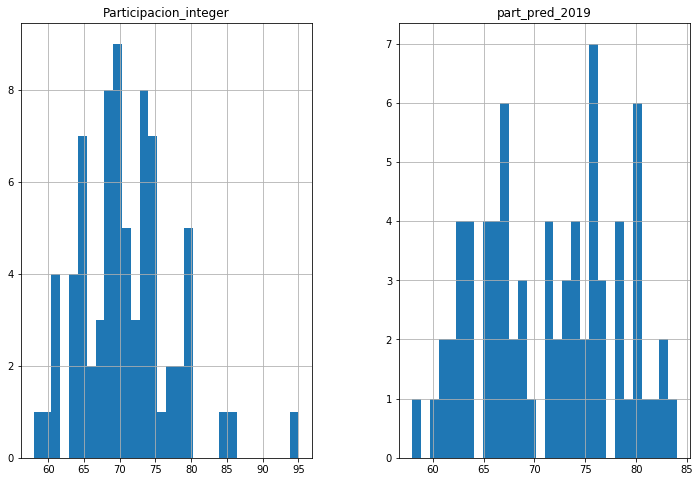

In [119]:
df_final_gip.hist(column=['Participacion_integer', 'part_pred_2019'],figsize=(12,8), bins=30);